# Week 5 Notes: Homework Q, plotting data from external files

## Homework Question Q05.33

Q05.33 The 1D NumPy array F is defined below. But construct your code to work with any 1D NumPy array filled with numbers.

F = np.array([5, -4.7, 99, 50, 6, -1, 0, 50, -78, 27, 10])

(a) Select all the elements from F that are greater than 5 and store them in x.

(b) Select all of the elements from F that are between 5 and 30. Store them in y.

(c) Select all of the elements from F that are between 5 and 30 or that are equal to 50. Store them in z.

In [1]:
import numpy as np

In [2]:
F = np.array([5, -4.7, 99, 50, 6, -1, 0, 50, -78, 27, 10])

In [3]:
F

array([  5. ,  -4.7,  99. ,  50. ,   6. ,  -1. ,   0. ,  50. , -78. ,
        27. ,  10. ])

In [4]:
# (a) Select all the elements from F that are greater than 5 and store them in x
mask1 = F>5
x = F[mask1]
print(x)

[99. 50.  6. 50. 27. 10.]


In [5]:
# (b) Select all of the elements from F that are between 5 and 30. Store them in y.
mask2 = 5<F
mask3 = F<30
# np.logical_and?
mask4 = np.logical_and(mask2,mask3)
y = F[mask4]
print(y)

[ 6. 27. 10.]


In [6]:
# (c) Select all of the elements from F that are between 5 and 30 or that are equal to 50. Store them in z.
mask2 = 5<F
mask3 = F<30
# Select all of the elements from F that are between 5 and 30
mask4 = np.logical_and(mask2,mask3)
# Select all of the elements from F that are equal to 50
mask5 = F==50
# Select all of the elements from F that are between 5 and 30 or equal to 50
mask6 = np.logical_or(mask4,mask5)
z = F[mask6]
print(z)

[50.  6. 50. 27. 10.]


## Example 1: Tide Data

Download the tide_data.csv file from D2L-->Contents-->Week 4--> tide_data.csv. Move tide_data.csv into the same folder as the running Jupyter notebook.

#### Check tide_data.csv is in fact in the same folder as this running Jupyter notebook

In [7]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 1236-A93E

 Directory of C:\Users\peter.kazarinoff\Documents\ENGR114-2021Q1\class_notes\week_5

02/01/2021  11:48 AM    <DIR>          .
02/01/2021  11:48 AM    <DIR>          ..
02/01/2021  09:29 AM    <DIR>          .ipynb_checkpoints
02/01/2021  09:09 AM             1,556 Agenda_week_5.ipynb
02/01/2021  11:25 AM            11,670 FET_data.xlsx
02/01/2021  11:46 AM            19,505 fet_plot.png
02/01/2021  10:09 AM             6,903 tide_data.csv
02/01/2021  11:19 AM            19,380 tide_data_plot.png
02/01/2021  11:48 AM            68,341 week_5_Notes_HW_Question_plotting_from_external_data.ipynb
               6 File(s)        127,355 bytes
               3 Dir(s)  76,366,577,664 bytes free


#### Imports

NumPy for arrays, Matplotlib for plotting, and Pandas for bringing the data into the notebook

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Pull in the data from tide_data.csv using pandas and take a look at it

In [9]:
df = pd.read_csv("tide_data.csv")
df.tail()

,Date Time,Hours,Water Level
236,10/2/2017 23:36,23.6,-0.192
237,10/2/2017 23:42,23.7,-0.182
238,10/2/2017 23:48,23.8,-0.169
239,10/2/2017 23:54,23.9,-0.157
240,10/3/2017 0:00,24.0,-0.141


#### Create a NumPy array that just has two columns, one column for Hours and one Column for Water Level

In [10]:
print(df.columns)
df.drop(columns=['Date Time'], inplace=True)
df.head()

Index(['Date Time', 'Hours', ' Water Level'], dtype='object')


,Hours,Water Level
0,0.0,-0.029
1,0.1,0.002
2,0.2,0.032
3,0.3,0.058
4,0.4,0.089


In [11]:
# convert the data
td = np.array(df)
# print(td)

In [12]:
# print out the water level at high tide and the water level at low tide
wl = td[:,1]
#print(wl)
wl_ht = np.max(wl)
wl_lt = np.min(wl)
print(f"The water level at high tide is: {round(wl_ht,3)} m and the water level at low tide is: {round(wl_lt,3)} m")

The water level at high tide is: 0.553 m and the water level at low tide is: -0.515 m


In [13]:
# print out how long in between high tide and low tide
mask_lt = wl==wl_lt
mask_ht = wl==wl_ht
hrs = td[:,0]
t_lt = hrs[mask_lt]
t_ht = hrs[mask_ht]
t_between = t_ht - t_lt
print(f"The time between high tide and low tide is {t_between[0]} hrs")

The time between high tide and low tide is 5.1 hrs


#### Build a plot of the tide data

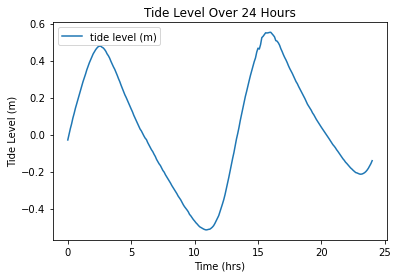

In [14]:
# imports (already done)

# data (already done, wl array is the water level and hrs array is the number of hours)

# fig, ax object
fig, ax = plt.subplots()

# plot the data
ax.plot(hrs,wl)

# customize the plot
ax.set_xlabel('Time (hrs)')
ax.set_ylabel('Tide Level (m)')
ax.set_title('Tide Level Over 24 Hours')
ax.legend(['tide level (m)'])

# save and show the plot
plt.savefig('tide_data_plot.png', dpi=72)
plt.show()

## Example 2: FET Data

In [15]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# make sure fet_data.xlsx file is in the same folder as this running Jupyter notebook
%ls

 Volume in drive C is OS
 Volume Serial Number is 1236-A93E

 Directory of C:\Users\peter.kazarinoff\Documents\ENGR114-2021Q1\class_notes\week_5

02/01/2021  11:48 AM    <DIR>          .
02/01/2021  11:48 AM    <DIR>          ..
02/01/2021  09:29 AM    <DIR>          .ipynb_checkpoints
02/01/2021  09:09 AM             1,556 Agenda_week_5.ipynb
02/01/2021  11:25 AM            11,670 FET_data.xlsx
02/01/2021  11:46 AM            19,505 fet_plot.png
02/01/2021  10:09 AM             6,903 tide_data.csv
02/01/2021  11:57 AM            19,380 tide_data_plot.png
02/01/2021  11:48 AM            68,341 week_5_Notes_HW_Question_plotting_from_external_data.ipynb
               6 File(s)        127,355 bytes
               3 Dir(s)  76,366,577,664 bytes free


In [17]:
# pull in the fet_data.xlsx data file into a Pandas dataframe and convert to a NumPy array
df = pd.read_excel('FET_data.xlsx', header=None)
df.head()

,0,1
0,-40,8.170000e-10
1,-39,1.190000e-09
2,-38,1.070000e-09
3,-37,1.350000e-09
4,-36,1.410000e-09


In [18]:
fet = np.array(df)
print(fet)

[[-4.00e+01  8.17e-10]
 [-3.90e+01  1.19e-09]
 [-3.80e+01  1.07e-09]
 [-3.70e+01  1.35e-09]
 [-3.60e+01  1.41e-09]
 [-3.50e+01  1.44e-09]
 [-3.40e+01  7.10e-10]
 [-3.30e+01  1.19e-09]
 [-3.20e+01  1.10e-09]
 [-3.10e+01  5.32e-10]
 [-3.00e+01  4.80e-10]
 [-2.90e+01  7.75e-10]
 [-2.80e+01  1.40e-09]
 [-2.70e+01  5.71e-10]
 [-2.60e+01  7.66e-10]
 [-2.50e+01  4.45e-10]
 [-2.40e+01  8.83e-10]
 [-2.30e+01  4.26e-10]
 [-2.20e+01  5.76e-10]
 [-2.10e+01  7.20e-10]
 [-2.00e+01  8.99e-10]
 [-1.90e+01  9.45e-10]
 [-1.80e+01  5.12e-10]
 [-1.70e+01  2.79e-10]
 [-1.60e+01  2.71e-10]
 [-1.50e+01  3.01e-10]
 [-1.40e+01  6.44e-10]
 [-1.30e+01  2.74e-10]
 [-1.20e+01  5.69e-10]
 [-1.10e+01  2.48e-10]
 [-1.00e+01  6.11e-10]
 [-9.00e+00  2.63e-10]
 [-8.00e+00  2.03e-10]
 [-7.00e+00  2.10e-10]
 [-6.00e+00  3.33e-10]
 [-5.00e+00  2.61e-10]
 [-4.00e+00  2.11e-10]
 [-3.00e+00  3.92e-10]
 [-2.00e+00  2.68e-10]
 [-1.00e+00  2.44e-10]
 [ 0.00e+00  3.88e-10]
 [ 1.00e+00  2.76e-10]
 [ 2.00e+00  2.26e-10]
 [ 3.00e+00

In [19]:
# find the max amount of current, the min amount of current and the on/off ratio (ratio between min and max)
v = fet[:,0]
i = fet[:,1]
i_max = np.max(i)
i_min = np.min(i)
i_on_off = i_max/i_min
print(f"The max current is: {i_max} A, the min current is: {i_min} A, and the on/off ratio is {round(i_on_off,0)}")

The max current is: 9.32e-05 A, the min current is: 1.09e-10 A, and the on/off ratio is 855046.0


### Plot

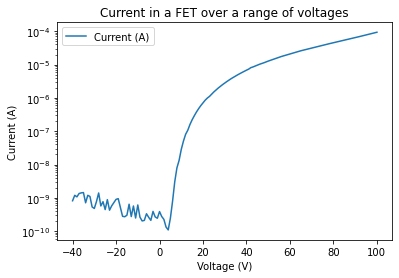

In [20]:
# imports - done

# data - done, v is voltage array, i is current array

# fig, ax
fig, ax = plt.subplots()

# plot data
ax.semilogy(v,i)

# customize the plot
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')
ax.set_title('Current in a FET over a range of voltages')
ax.legend(['Current (A)'])

# save and show the plot
plt.savefig('fet_plot.png', dpi=72)
plt.show()